# Mechanics Lab 12 -- Phase space and Poincaré sections
So far, we have primarily looked at $\phi$(t) vs t.  Plotting the momentum conjugate of $\phi$(t) vs. $\phi$(t) gives us a completely different and, in many ways, more informative way to look at the motion. (Note: For DDP, the momentum conjugate of $\phi$(t) is just the angular momentum. You will learn more about conjugate momentum later in the semester.)

## Objectives

In this lab you will 
* construct phase space diagrams and Poincaré sections for the damped driven pendulum system;
* identify signatures of the non-chaotic, period doubling, and chaotic behavior in phase space diagrams and Poincare sections;
* produce a Poincaré section showing a strange attractor and determine what parameters effect it.


In [1]:
%pylab inline
from scipy.integrate import odeint  # import the differential equation integrator
from scipy.interpolate import UnivariateSpline

Populating the interactive namespace from numpy and matplotlib


## Set up
### Exercise 12.1

Since we are working once again with a damped driven pendulum, start by copying over your `deriv()` and your `solveDDP()` functions from last week's lab (Lab 11). Then numerically find the solution to a damped driven pendulum with $\phi$(t = 0) = -$\pi$/2 and d$\phi$/dt (t = 0) = 0 for 0 < t < 30. As in last week's exercise, set the angular frequency of the driving force ($\Omega_D$) to 2$\pi$, producing a drive period of $2 \pi / \Omega_D = 1$ s. Set the natural frequency ($\omega_0$) to 1.5$\Omega_D$, and set the damping constant ($\beta = \frac{\omega_0}{4}$. You will be varying the drive strength ($\gamma_D$) but for now set it to **$\gamma_D = 0.7$**. Let the mass of the pendulum and the length of the pendulum be 1 (in the appropriate units).  Look over your `solveDDP()` function and modify it, if necessary, to use fixed time steps, e.g., $\Delta t = 0.01$. You may choose to use `arange()` rather than `linspace()` to form your time array to make it easier to choose $\Delta t$. Later, when we carry the integration for longer times, we can keep the same resolution, but increase the total number of steps.

In [2]:
# deriv() and solveDDP()
omegaD = 2*pi
omega0 = 1.5*omegaD
betaD = omega0/4
periodD = 2*pi/omegaD

m = 1
l = 1

def deriv(vec,time,param):
    phi = vec[0]
    dphi = vec[1]
    gamma = param[0]
    dphir = dphi
    ddphi = -2*betaD*dphi-omega0**2*sin(phi)+gamma*omega0**2*cos(omegaD*time)
    return array([dphir,ddphi], float)

def solveDDP(phi,dphi,tMax,gamma):
    time = arange(0,tMax,0.01)
    rInit = array([phi,dphi])
    param = array([gamma])
    r = odeint(deriv, rInit, time, args = (param,))
    time = [[i] for i in time]
    return append(time,r,axis=1)

fSol = solveDDP(-pi/2,0,30,0.7)
time = fSol[:,0]
phi = fSol[:,1]
dphi = fSol[:,2]

## Phase Space

#### Exercise 12.2
Plot both $\phi$ vs. t and the corresponding phase space plot.

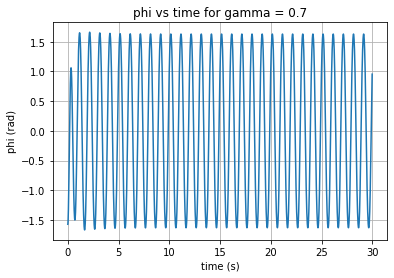

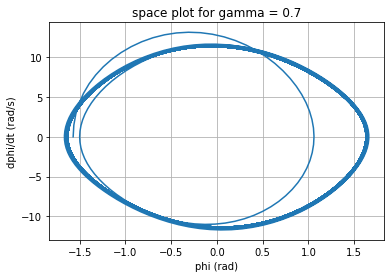

In [3]:
# Plots for gamma = 0.7
def pplot(phi,dphi,gamma,start,end):
    fSol = solveDDP(phi,dphi,end,gamma)
    time = fSol[:,0]
    phi = fSol[:,1]
    dphi = fSol[:,2]
    
    figure()
    plot(time[start*100:end*100],phi[start*100:end*100])
    grid()
    xlabel('time (s)')
    ylabel('phi (rad)')
    title('phi vs time for gamma = {}'.format(gamma))

    figure()
    plot(phi[start*100:end*100],dphi[start*100:end*100])
    grid()
    xlabel('phi (rad)')
    ylabel('dphi/dt (rad/s)')
    title('space plot for gamma = {}'.format(gamma))
    
pplot(-pi/2,0,0.7,0,30)

#### Exercise 12.3
In Lab 11, we learned that under certain conditions, identical systems started with different initial conditions will exhibit the same oscillatory motion after a transient. This type of motion is called an attractor because the system gets "attracted" to that motion. 

In the space below, explain how the attractor at $\gamma = 0.7$ is apparent in both plots in Ex. 12.2. You may want to display your phase space after eliminating the transient. That period of time is easily identified from the time series $\phi$ vs. t.

    When observing both plot from 5 to 10 seconds, we see that the motion is fiarly consistent. Excluding the transient motion, we can easily see the attractor of the system. 

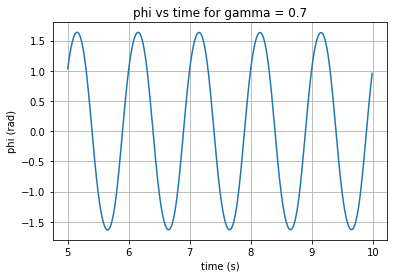

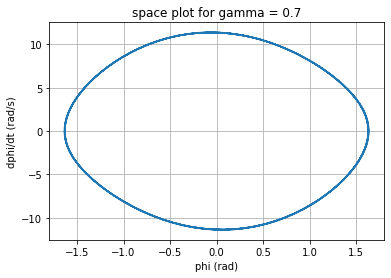

In [4]:
pplot(-pi/2,0,0.7,5,10)

#### Exercise 12.4
Remake both plots for a value of $\gamma$ = 1.070.

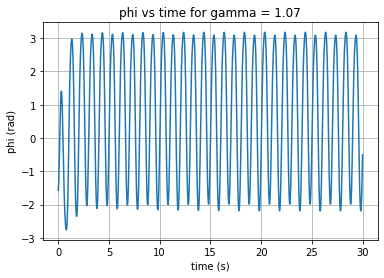

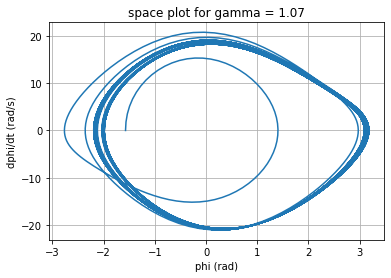

In [5]:
# Plots for gamma = 1.070
pplot(-pi/2,0,1.07,0,30)

#### Exercise 12.5
Using $\gamma$ = 1.070 produces "period doubling." Explain how period doubling appears in both graphs in Ex. 12.4.

    In the phi vs time graph, we can see that the amplitude of the neiboring curves are different. The amplitude of the curves repeat for every 2 crests. In space plot, we have to repeating trajectories. 

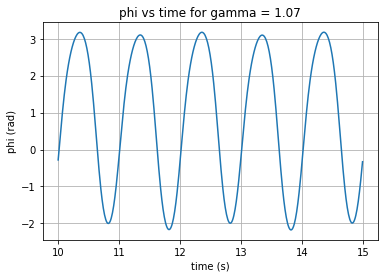

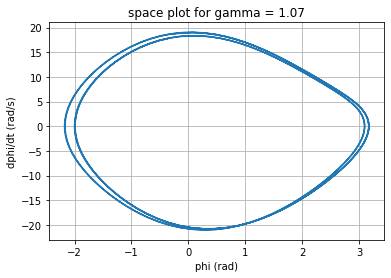

In [6]:
pplot(-pi/2,0,1.07,10,15)

#### Exercise 12.6
Continue to get a feel for phase-space. Repeat the two graphs for $\gamma = 1.100$. Can you find a version of phase space that, when plotted after the transient has passed, reveals a structure you can identify? What if you pick a longer maxTime and then eliminate a longer transient from your phase space portrait?

This is a period 7 motion. If we observe the phi vs time and space plot from 65s to 75 seconds. we could count the cycles in space plot and find that there are 7 cycles. 

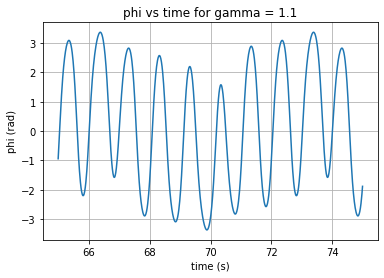

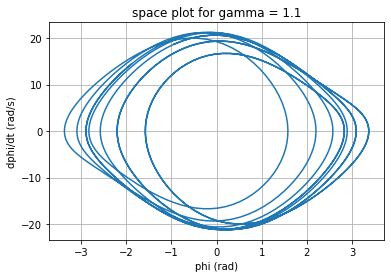

In [7]:
# Plots for gamma = 1.100
pplot(-pi/2,0,1.1,65,75)

In general, simply plotting angular momentum vs. angle will produce nice phase-space diagrams for low values of gamma.  As we increase gamma, though, we can run into problems.  

#### Exercise 12.7
For example, try producing a phase space for $\gamma$ = 1.500. Qualitatively describe the motion of the pendulum.

   Motion in general is counterclockwise. 

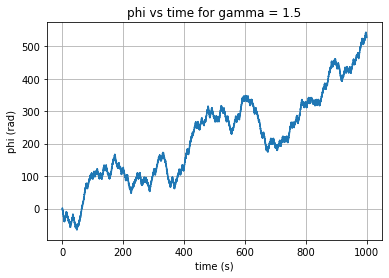

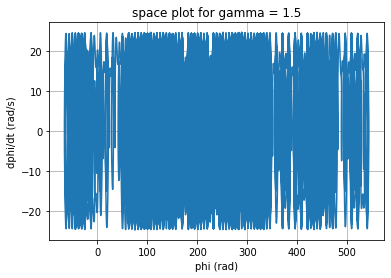

In [8]:
# Plots for gamma = 1.500
pplot(-pi/2,0,1.5,0,1000)

In order to get a more usable phase space diagram, we will want to limit $\phi$ to between -$\pi$ and +$\pi$.  For example, if our numerical solution gives us a value of $\phi$ = $\pi$ + 1 we would like our plot to interpret that as -$\pi$ + 1.  Similarly, $\phi$ = 2$\pi$ + 1 should be interpreted as $\phi$ = 1.  

#### Exercise 12.8
Adjust your code to produce both plots so that the values plotted on the $\phi$ axis range between -$\pi$ and +$\pi$. Then verify your code by including plots for $\phi$ vs t and d$\phi$/dt vs $\phi$ for $\gamma$ = 1.400.
*Hint: the modulo operation will be particularly helpful for this.*

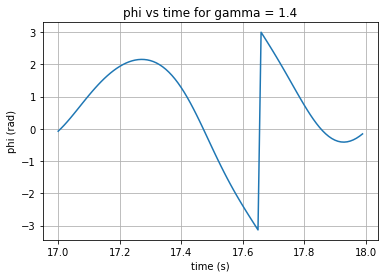

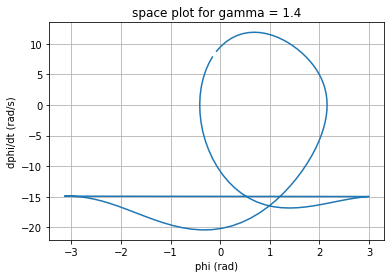

In [9]:
# Plots for gamma = 1.400

def pplot(phi,dphi,gamma,start,end):
    fSol = solveDDP(phi,dphi,end,gamma)
    time = fSol[:,0]
    phi = fSol[:,1]
    dphi = fSol[:,2]
    
    phi = [mod(i+pi,2*pi)-pi for i in phi]
    
    figure()
    plot(time[start*100:end*100],phi[start*100:end*100])
    grid()
    xlabel('time (s)')
    ylabel('phi (rad)')
    title('phi vs time for gamma = {}'.format(gamma))

    figure()
    plot(phi[start*100:end*100],dphi[start*100:end*100])
    grid()
    xlabel('phi (rad)')
    ylabel('dphi/dt (rad/s)')
    title('space plot for gamma = {}'.format(gamma))
    
pplot(-pi/2,0,1.4,17,18)

#### Exercise 12.9
What is the source of the horizontal lines across your phase space plot? Can you write a function that gets rid of them? (Inserting np.nan, for example, in the right places.)

    Because we normalize our motion from -pi to pi, the horizontal line shows up because when we move from -pi to pi, the time interval is short. 

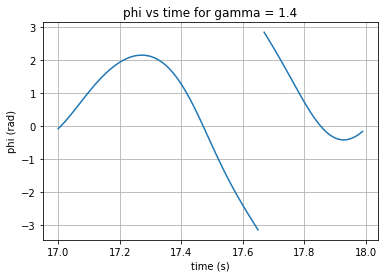

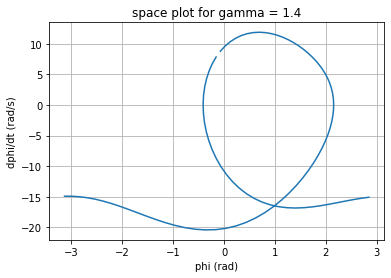

In [55]:
def pplot(phi,dphi,gamma,start,end):
    fSol = solveDDP(phi,dphi,end,gamma)
    time = fSol[:,0]
    phi = fSol[:,1]
    dphi = fSol[:,2]
    
    phi = [mod(i+pi,2*pi)-pi for i in phi]
    
    phif = where(abs(diff(append([0],phi)))>=6.11,nan,phi)
    
    figure()
    plot(time[start*100:end*100],phif[start*100:end*100])
    grid()
    xlabel('time (s)')
    ylabel('phi (rad)')
    title('phi vs time for gamma = {}'.format(gamma))

    figure()
    plot(phif[start*100:end*100],dphi[start*100:end*100])
    grid()
    xlabel('phi (rad)')
    ylabel('dphi/dt (rad/s)')
    title('space plot for gamma = {}'.format(gamma))
    
pplot(-pi/2,0,1.4,17,18)

## Poincaré Sections
So far, our phase space diagrams have been very simple.  However, once we enter the chaotic regime, they can get complicated fast.  Therefore, we are going to introduce another new tool: Poincaré sections.  Rather than plotting the entire phase space orbit, Poincaré sections only plot the position in phase space *once every period*.  This is analogous to a bifurcation diagram where the $\phi$ value every period is plotted against $\gamma$.  The difference is that here we will plot angular momentum versus angle every period, rather than just the angle every period versus the forcing.

**Exercise 12.10**: 

Based on your previous phase space plot (Exercise 12.1) for $\gamma$ = 0.700, predict what the Poincaré section will look like.

    The Poincare section will tends to a single point, which is the attractor of the system.  

In order to plot the Poincaré section, you will need to know the values of phi and phiDot at specific times. Because the times you want may not have been included in your time array, you'll need to interpolate across data points. A "spline" function is the easiest way to do this, and if you have started your homework for this week, you'll be familiar with the spline function. I've included an example below.

[ 1.00656788  0.04790091 -0.83261154]


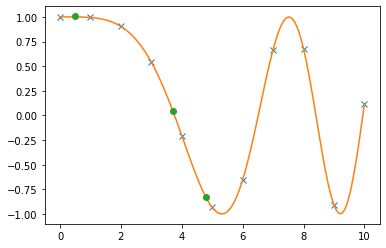

In [56]:
from scipy.interpolate import UnivariateSpline

#In these next two lines, I will just define some test data
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)

# This call creates the spline fit to the function. 
# The first value in the function call is your x data, 
# the second is your y data.
# The values of k = 5,s = 0 were chosen to make the fit; 
# k = 5 tells it do a fifth degree polynomial fit, 
# and s = 0 tells it go through all the data points.
spl = UnivariateSpline(x,y,k = 5,s = 0)
# The next two lines of code uses the above spline fit 
# to interpolate the value of y at the given x values.
x_fit = [0.5,3.7,4.8] #define the list of values I want to find y values for
y_fit = spl([0.5,3.7,4.8])
print(y_fit)

#To demonstrate the accuracy of the fit, I'll plot both the data points given, the theoretical curve connecting them, 
# and the interpolated values
plot(x,y,'x') #Data points
plot(np.linspace(0, 10, num=110, endpoint=True),np.cos(-np.linspace(0, 10, num=110, endpoint=True)**2/9.0)) #Theoretical curve connecting data points
plot(x_fit,y_fit,'o') #interpolated values

#### Exercise 12.11

Create a Poincaré section for $\gamma$ = 0.700. To do this, use a spline fit to find the values of $\phi$(t) and $m l \dot\phi$(t) over all time. Then create an array of numbers from 20 to 60 in steps of the drive period: $\Delta t = 2\pi/\Omega_D$. Since the spline fits, `phiFit` and `angMomFit`, are smoothed functions over your original time array, you can use the number array as indices to create a new array of the values every drive period from $t = 20$ to $t = 60$ s, e.g. `phiFit(indices)`.

Starting at $t = 20$, rather than $t = 0$ means that transient behavior is eliminated. You still have to modify your `phiFit(indices)` values to lie between $-\pi$ and $\pi$ as you did in Ex. 12.8. Then plot (as points, rather than a line) your angular momentum spline  vs your modulo $\phi$ spline at those discrete time steps. Set your axis range to $-\pi < \phi < \pi$ and $-15 < m l \dot\phi < 15$ so that it will be easily comparable to your plot from Exercise 12.2.

Hint:  when using the plot command, the smallest marker is a single pixel, designated by a `','`.  Slightly larger markers are designated with a `'.'` and a *kwarg* marker size (`ms = 4`, for example).  Some options:

```python
plot(x, y, ',k')            #black dot (single pixel)
plot(x, y, '.b')            #blue dot, small
plot(x, y, '.r', ms = 4)    #red dot, medium
plot(x, y, ',g', ms = 100)  #green dot (single pixel; ms is ignored)
```

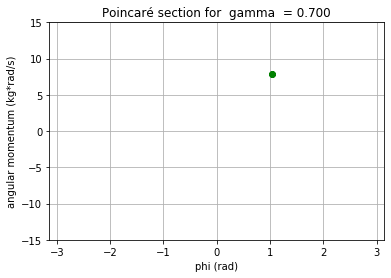

In [59]:
# Poincaré plot for gamma = 0.7

num = arange(20,60,2*pi/omegaD)

fSol = solveDDP(-pi/2,0,60,0.7)
time = fSol[2000:,0]
phi = fSol[2000:,1]
dphi = fSol[2000:,2]

phi = [mod(i+pi,2*pi)-pi for i in phi]
angmom = m*l*dphi

spl_phi = UnivariateSpline(time,phi,k=5,s=0)
phiFit = spl_phi(num)

spl_angmom = UnivariateSpline(time,angmom,k=5,s=0)
angmomFit = spl_angmom(num)


figure()
plot(phiFit,angmomFit,'.g',ms = 10)
xlabel('phi (rad)')
ylabel('angular momentum (kg*rad/s)')
title('Poincaré section for  gamma  = 0.700')
xlim(-pi,pi)
ylim(-15,15)
grid()


#### Exercise 12.12
Is your Poincaré section what you expected? Explain.
    
    Yes, becasause as time moves on, the points on Poincare section move towards a single point, which is the attractor. 

#### Exercise 12.13
For each of $\gamma$  = 1.078, 1.081, and 1.105 generate a phase space plot and predict what the Poincaré section will look like.  Then, generate the Poincaré section. Include all of your plots and predictions below. Adjust your axes ranges (or `xlim()` and `ylim()`) and `tMax` to produce good plots.

These are a series of gamma for period doubleing cascade. So the shape of phase space are similar. 

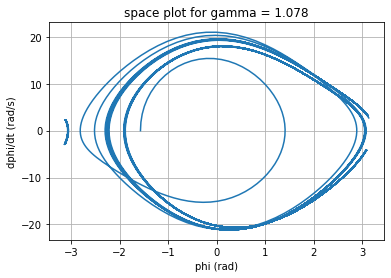

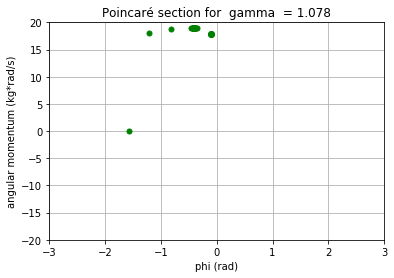

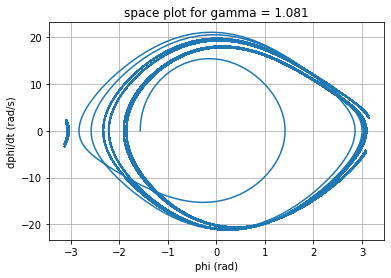

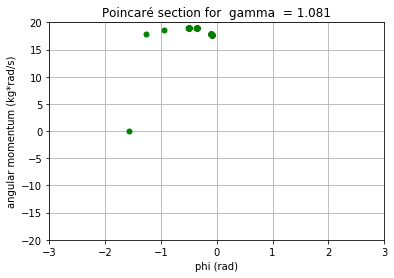

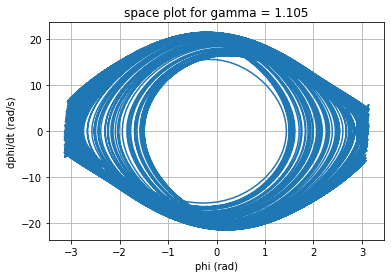

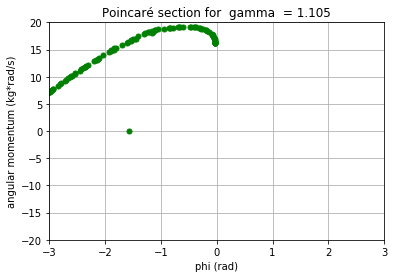

In [72]:
# Phase space and Poincaré plots for gamma = 1.078, 1.081, and 1.105
def phspace(phi,dphi,gamma,start,end):
    fSol = solveDDP(phi,dphi,end,gamma)
    time = fSol[:,0]
    phi = fSol[:,1]
    dphi = fSol[:,2]
    phi = [mod(i+pi,2*pi)-pi for i in phi]
    
    phif = where(abs(diff(append([0],phi)))>=6.11,nan,phi)

    figure()
    plot(phif[start*100:end*100],dphi[start*100:end*100])
    grid()
    xlabel('phi (rad)')
    ylabel('dphi/dt (rad/s)')
    title('space plot for gamma = {}'.format(gamma))
    
    angmom = m*l*dphi
    
    num = arange(start,end,2*pi/omegaD)
    spl_phi = UnivariateSpline(time,phi,k=5,s=0)
    phiFit = spl_phi(num)
    spl_angmom = UnivariateSpline(time,angmom,k=5,s=0)
    angmomFit = spl_angmom(num)

    figure()
    plot(phiFit,angmomFit,'.g',ms = 10)
    xlabel('phi (rad)')
    ylabel('angular momentum (kg*rad/s)')
    title('Poincaré section for  gamma  = {}'.format(gamma))
    xlim(-3,3)
    ylim(-20,20)
    grid()
    
    
    
phspace(-pi/2,0,1.078,0,100)
phspace(-pi/2,0,1.081,0,100)
phspace(-pi/2,0,1.105,0,100)


## Strange Attractors

As you would imagine, things get very exciting in the chaotic regime. You'll start by looking at the system for $\beta$=$\frac{\omega_0}{8}$ and $\gamma$ = 1.500.

#### Exercise 12.14 
First plot $\phi$ vs t and the phase diagram for the above values.

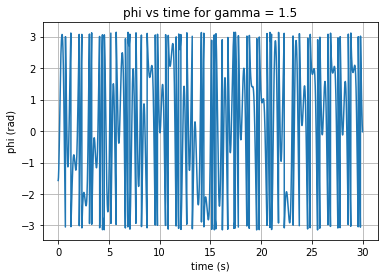

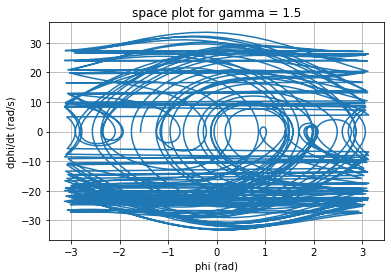

In [89]:
# Phase Space diagram
omegaD = 2*pi
omega0 = 1.5*omegaD
betaD = omega0/8
periodD = 2*pi/omegaD
m = 1
l = 1
pplot(-pi/2,0,1.5,0,30)

#### Exercise 12.15
Now plot the Poincaré section. Clip your transient behavior for t < 20. Keep on increasing the maximum time until you get a pattern you like and/or it starts taking too long to run. *Hint: to plot a very small point, use `','` to indicate the marker in the plot function. You can also increase your figure size by using a command like this: `figure(figsize=(12, 8))`.

<Figure size 864x576 with 0 Axes>

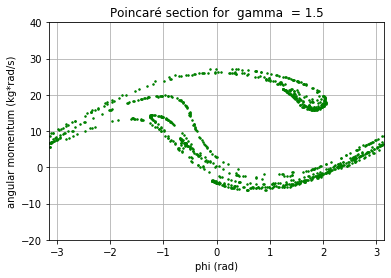

<Figure size 864x576 with 0 Axes>

In [80]:
# Poincaré section
omegaD = 2*pi
omega0 = 1.5*omegaD
betaD = omega0/8
periodD = 2*pi/omegaD
m = 1
l = 1
tmax = 1000
num = arange(20,tmax,2*pi/omegaD)

fSol = solveDDP(-pi/2,0,tmax,1.5)
time = fSol[2000:,0]
phi = fSol[2000:,1]
dphi = fSol[2000:,2]

phi = [mod(i+pi,2*pi)-pi for i in phi]
angmom = m*l*dphi

spl_phi = UnivariateSpline(time,phi,k=5,s=0)
phiFit = spl_phi(num)

spl_angmom = UnivariateSpline(time,angmom,k=5,s=0)
angmomFit = spl_angmom(num)

figure()
plot(phiFit,angmomFit,'.g',ms = 3)
xlabel('phi (rad)')
ylabel('angular momentum (kg*rad/s)')
title('Poincaré section for  gamma  = 1.5')
xlim(-pi,pi)
ylim(-20,40)
grid()
figure(figsize=(12, 8))

Initially, it seemed like there was no underlying structure to the motion of a chaotic pendulum.  Now, however, we see that there is.  The pattern you have produced is called a "strange attractor," something typical of chaotic systems.  Although not very evident here, strange attractors have a fractal structure.

#### Exercise 12.16
Do you expect the Poincaré Diagram to change if you try different initial conditions?  How so? Test your prediction.

No, because there is an attractor for this situation in particular. 

<Figure size 864x576 with 0 Axes>

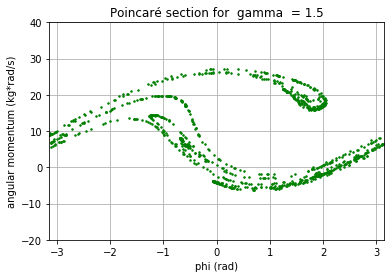

<Figure size 864x576 with 0 Axes>

In [90]:
# Poincaré section with different initial conditions

# Poincaré section
omegaD = 2*pi
omega0 = 1.5*omegaD
betaD = omega0/8
periodD = 2*pi/omegaD
m = 1
l = 1
tmax = 1000
num = arange(20,tmax,2*pi/omegaD)

fSol = solveDDP(-pi,pi,tmax,1.5)
time = fSol[2000:,0]
phi = fSol[2000:,1]
dphi = fSol[2000:,2]

phi = [mod(i+pi,2*pi)-pi for i in phi]
angmom = m*l*dphi

spl_phi = UnivariateSpline(time,phi,k=5,s=0)
phiFit = spl_phi(num)

spl_angmom = UnivariateSpline(time,angmom,k=5,s=0)
angmomFit = spl_angmom(num)

figure()
plot(phiFit,angmomFit,'.g',ms = 3)
xlabel('phi (rad)')
ylabel('angular momentum (kg*rad/s)')
title('Poincaré section for  gamma  = 1.5')
xlim(-pi,pi)
ylim(-20,40)
grid()
figure(figsize=(12, 8))

#### Exercise 12.17
Do you expect the Poincaré Diagram to change for different values of the forcing and damping?  How so? Test your prediction.

Yes, because the entire situation is changed with different set of forcing and damping. 

<Figure size 864x576 with 0 Axes>

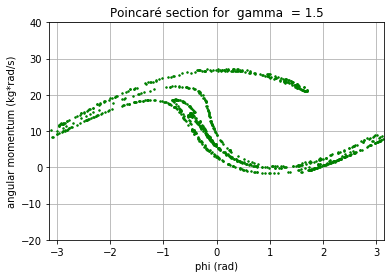

<Figure size 864x576 with 0 Axes>

In [92]:
# Poincaré section with different forcing

omegaD = 2*pi
omega0 = 1.5*omegaD
betaD = omega0/6
periodD = 2*pi/omegaD
m = 1
l = 1
tmax = 1000
num = arange(20,tmax,2*pi/omegaD)

fSol = solveDDP(-pi/2,0,tmax,1.7)
time = fSol[2000:,0]
phi = fSol[2000:,1]
dphi = fSol[2000:,2]

phi = [mod(i+pi,2*pi)-pi for i in phi]
angmom = m*l*dphi

spl_phi = UnivariateSpline(time,phi,k=5,s=0)
phiFit = spl_phi(num)

spl_angmom = UnivariateSpline(time,angmom,k=5,s=0)
angmomFit = spl_angmom(num)

figure()
plot(phiFit,angmomFit,'.g',ms = 3)
xlabel('phi (rad)')
ylabel('angular momentum (kg*rad/s)')
title('Poincaré section for  gamma  = 1.5')
xlim(-pi,pi)
ylim(-20,40)
grid()
figure(figsize=(12, 8))

#### Exercise 12.18
Now, regenerate your plot $\beta$=$\frac{\omega_0}{8}$ and $\gamma$ = 1.500. *However*, start your series of time instances at a slightly different instance in time. For instance, rather than plotting angular momentum vs angle at t = 20.0, 21.0, 22.0, 23.0 etc., plot them for t = 20.05, 21.05, 22.05 etc. Therefore your plot will still generate a point once per period of forcing but at a slightly later time. Slowly increase your starting time in steps of 0.05 to see how the sections of the Poincaré plot evolve. *Hint: to speed things along you'll probably want to use a lower maximum time for this series than you did for your main Poincaré plot.*

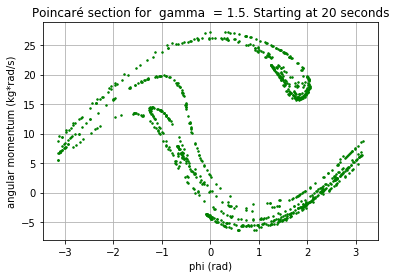

In [99]:
# Poincaré section
def psplot(st):
    omegaD = 2*pi
    omega0 = 1.5*omegaD
    betaD = omega0/8
    periodD = 2*pi/omegaD
    m = 1
    l = 1
    tmax = 1000
    num = arange(st,tmax,2*pi/omegaD)

    fSol = solveDDP(-pi/2,0,tmax,1.5)
    time = fSol[2000:,0]
    phi = fSol[2000:,1]
    dphi = fSol[2000:,2]

    phi = [mod(i+pi,2*pi)-pi for i in phi]
    angmom = m*l*dphi

    spl_phi = UnivariateSpline(time,phi,k=5,s=0)
    phiFit = spl_phi(num)

    spl_angmom = UnivariateSpline(time,angmom,k=5,s=0)
    angmomFit = spl_angmom(num)

    figure()
    plot(phiFit,angmomFit,'.g',ms = 3)
    xlabel('phi (rad)')
    ylabel('angular momentum (kg*rad/s)')
    title('Poincaré section for  gamma  = 1.5. Starting at {} seconds'.format(st))
    grid()

psplot(20)

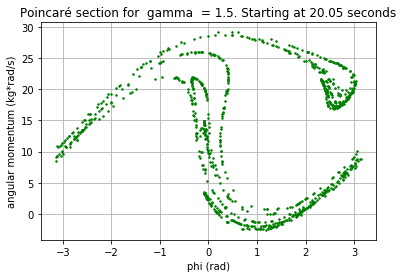

In [101]:
psplot(20.05)

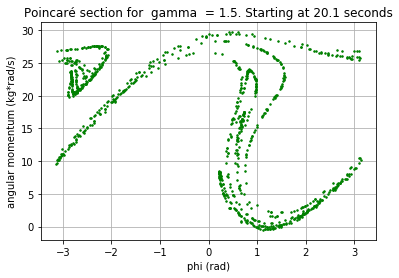

In [102]:
psplot(20.1)

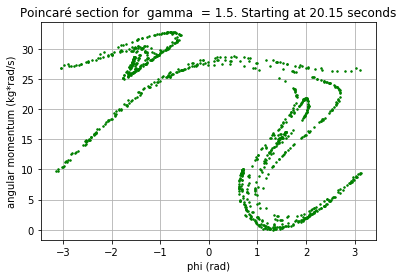

In [103]:
psplot(20.15)

## Check-out
#### Exercise 12.19

Briefly summarize in the cell below the ideas in today's lab.

In week's lab, we learned how to use spline to interpolate data points. We also learned how to draw Poincaré Sections. By drawing it, we are able to see the chaos when gamma increases.

## No challenge problems this week
However, you may want to use this time to start on the homework.